<a href="https://colab.research.google.com/github/hesandism/ML-projects/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2026-01-06 18:53:21--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.2’

cats_and_dogs.zip.2 100%[===================>]  67.43M   263MB/s    in 0.3s    

2026-01-06 18:53:22 (263 MB/s) - ‘cats_and_dogs.zip.2’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: cats_and_dogs/train
cats_and_dogs/validation
cats_and_dogs/test


In [37]:
train_data_gen[1]

(array([[[[0.29246116, 0.25324547, 0.21402977],
          [0.33039194, 0.29117626, 0.25196055],
          [0.3691159 , 0.3299002 , 0.29068452],
          ...,
          [0.40677762, 0.41462076, 0.2185423 ],
          [0.41473702, 0.42555246, 0.22055714],
          [0.4156863 , 0.427451  , 0.21960786]],
 
         [[0.29484215, 0.25562647, 0.21641079],
          [0.32548684, 0.28627115, 0.24705544],
          [0.36003363, 0.32081795, 0.28160226],
          ...,
          [0.40900406, 0.41976944, 0.21492428],
          [0.41987425, 0.43139696, 0.21984985],
          [0.42169118, 0.43345588, 0.21960786]],
 
         [[0.3047966 , 0.26558092, 0.22636522],
          [0.30900314, 0.26978746, 0.23057179],
          [0.32567367, 0.286458  , 0.2472423 ],
          ...,
          [0.41243276, 0.42419747, 0.21051025],
          [0.42880172, 0.44056642, 0.2210148 ],
          [0.43253613, 0.44430083, 0.22261009]],
 
         ...,
 
         [[0.54834455, 0.5012857 , 0.43854058],
          [0.51771

In [19]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size, class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size, class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory=PATH,target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size, classes=['test'],class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


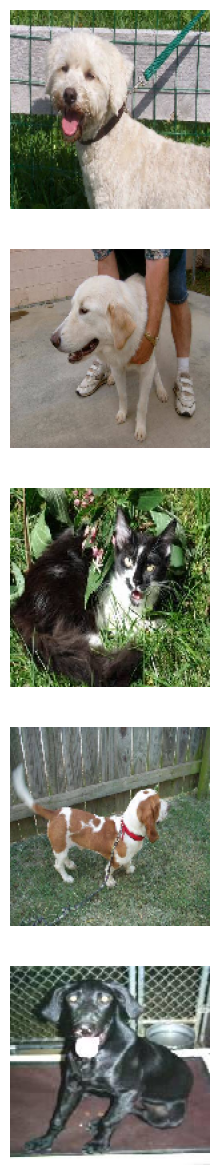

In [20]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [21]:
# 5
train_image_generator = ImageDataGenerator(rescale= 1./255, rotation_range=6)


Found 2000 images belonging to 2 classes.


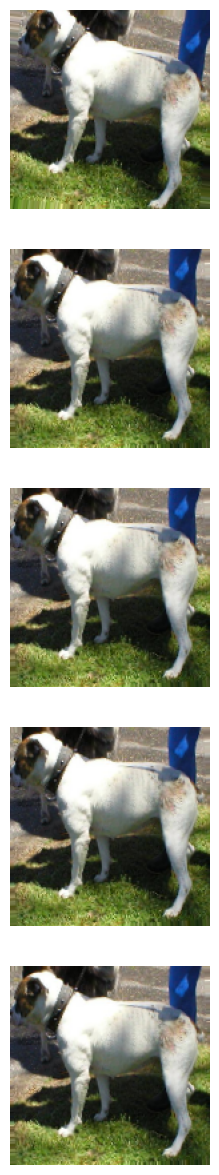

In [24]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [33]:
# 7
model = Sequential([
    # First convolutional block
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fourth convolutional block (helps get higher accuracy)
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a vector
    Flatten(),

    # Fully-connected (dense) layers
    Dense(512, activation='relu'),
    Dropout(0.5),                    # Helps prevent overfitting
    Dense(1, activation='sigmoid')   # Binary output: probability of being a dog
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 8
history = model.fit(x=train_data_gen,
                    epochs=epochs,
                    steps_per_epoch= total_train // batch_size,
                    validation_data= val_data_gen,
                    validation_steps=total_train // batch_size)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 8s/step - accuracy: 0.4994 - loss: 0.7003 - val_accuracy: 0.5980 - val_loss: 0.6923
Epoch 2/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4844 - loss: 0.6936 - val_accuracy: 0.5250 - val_loss: 0.6925
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 119s 8s/step - accuracy: 0.5249 - loss: 0.6923 - val_accuracy: 0.5060 - val_loss: 0.6922
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4609 - loss: 0.7010 - val_accuracy: 0.6010 - val_loss: 0.6844
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 119s 8s/step - accuracy: 0.5273 - loss: 0.6875 - val_accuracy: 0.6390 - val_loss: 0.6583
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5703 - loss: 0.6892 - val_accuracy: 0.6060 - val_loss: 0.6676
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 119s 8s/step - accuracy: 0.5864 - loss: 0.6638 - val_accuracy: 0.6560 - val_loss: 0.6250
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6094 - loss: 0.6590 - val_accuracy: 0.5790 - val_loss: 0.6790
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 118s 8s/step - accuracy: 0.6477 - loss: 0.6260 - val_accuracy: 0.6500 - val_loss: 0.6114

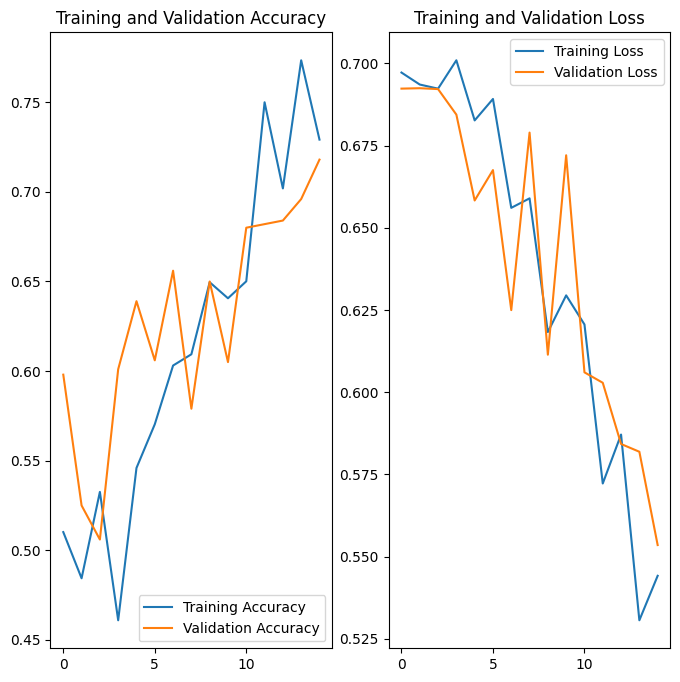

In [39]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")